# A study of drug spending and prices in the United States

**Note: ** Please install mpld3 using pip install mpld3 for the graphs to be interactive, otherwise they can be a little convoluted

<br>
<br>

<div class="inline-block"> <img src="https://i2.wp.com/www.southernmarylandchronicle.com/wp-content/uploads/2018/01/medicare-logo.jpg?w=600" style="width: 600px;"/> </div> 


This project will study the increases in drug prices in the United States in the years 2011 - 2015. With one of the word's most expensive costs for healthcare, the public often relies on Medicare programs in order to finance their health spending. While these programs help lower acquisition costs and co-pays, they can also present a heavy burden on the budget of the country, as funds need to be redirected towards purchasing drugs. Fortunately, the government has the power, influence, and size to significantly reduce the purchasing costs of many drugs, such that the price per unit is lower than if, say, bought at a pharmacy. 

The cost structure of Medicare is of interest to me, and I wanted to take a further look into how prices rise, or remain flat for an entitiy like the U.S. government. Furthermore, I wonder if the agreements between drug companies and the government have anything to do with the number of beneficiaries of the drug. Perhaps, the most common drugs are the most stable as the sheer size and volume of purchases is all that is needed to maintain profitability. But will that mean that the government is subject to price hikes on drugs with only a few thousand, or hundred beneficiaries?


To attempt to answer this question, I will be using the Medicare Drug Spending Data, collected by Centers for Medicare & Medicaid Services, which can be found in the [CMS page](https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Information-on-Prescription-Drugs/2015MedicareData.html)


## Data Report: 
As mentioned above, the data will be pulled from the CMS page. The variables in the table are the following: HCPCS Code, HCPS Description,Claim Count, Total Spending, Beneficiary Count, Total Annual Spending, Unit Count, Average Cost per Unit, and Average Beneficiary Cost Share for the years between 2011 and 2015.

### Variable Description
- `HCPCS Code:` Healthcare Common Procedure Coding System (HCPCS) code for the drug.

- `HCPCS Description:` HCPCS description of the drug.

- `Claim Count:` Number of Medicare Part B claims.  

- `Total Spending:` Aggregate drug spending for the Part B program. 

- `Beneficiary Count:` Number of Medicare Part B fee-for-service beneficiaries utilizing the drug.

- `Total Annual Spending per User:` Total Spending divided by the number of unique beneficiaries utilizing the drug (Beneficiary Count) during the benefit year.

- `Unit Count:` Total dosage units of medication billed during the calendar year (e.g. number of tablets, grams, milliliters or other units).

- `Average Cost per Unit:` Total Spending divided by the number of dosage units. 

- `Average beneficiary Cost Share:` Average amount that beneficiaries using the drug paid out of pocket during the year.

- `Annual Change in Average cost per unit (2015 only):` Annual change in average cost per unit reflects the percent change in average cost per unit between 2014 and 2015.  The average cost per unit is calculated for each year at the HCPCS level by dividing the total payment by total units and then a percentage change in unit costs between the two years is calculated. Available for drugs utilized by more than 5,000 beneficiaries in 2014 and 2015.

**Note:** For the variable Annual Change in Average Cost per unit, it is only available for the 2015 year, however I will instead calculate the difference myself based on the Average Cost Per unit across the years


### My Packages
I will be using the following packages

- `Pandas` package for importing, manipulating, and analazing data
- `Matplotlib` for plotting data
- `Mpld3` please install this using "pip install mpld3". This is important because I will be plotting 60 lines, with this I can make the graphs interactive
- `Requests`, `Zipfile` and `IO` are packages necessary for me to retrieve the data, open the zip file, and import it into a dataframe
- `Numpy` will be used to create arrays and do calculation within the array, since Pandas was giving me an error regarding creating a new column based on the values of other columns


## The Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt, mpld3 #Will be used to plot
import requests, zipfile, io #This helps retrieve the zip file from the page and extract it in oder to read it
import numpy as np #Will be needed for some of the array stuff

plt.rcParams['font.size'] = 12.5 #This sets a global fontsize for all labels


### Introductory Data: Putting the U.S. Federal Budget Into Perspective

Before we get started with the project, I want to highlight the importance of the questions I am asking. To do this, I have created a graph to put it all into perspective

### Retrieving the Data: Putting the U.S. Federal Budget Into Perspective

In [2]:
#Here I am reading a CSV, getting only the rows that matter and finally putting it into a DataFrame
url = 'https://www.usgovernmentspending.com/rev/usgs_downbudget_curr.php?span=usgs302&year=2012_2017&fy=fy19&view=2&expand=&expandC=&units=b&csv=&actual='
budget = pd.read_csv(url, skiprows = 3, nrows = 10)
budget = budget[['Year','FY 2015 Outlays']]

#Here is a look at the resulting Dataframe:
print(budget)
print(budget.dtypes)

                 Year FY 2015 Outlays
0            Pensions           953.6
1         Health Care         1,028.4
2           Education           133.8
3             Defense           798.0
4             Welfare           361.9
5          Protection            34.0
6      Transportation            89.5
7  General Government            43.7
8      Other Spending            22.4
9            Interest           223.2
Year               object
FY 2015 Outlays    object
dtype: object


The CSV files have everything as strings, which makes it hard to perform calculations, so first we have to clean up the data a little bit, before converting to a float from a string we must remove the commas from numbers like 1,028.40

### Manipulating the data: Putting the U.S. Federal Budget Into Perspective

In [3]:
#The CSV files have everything as strings, which makes it hard to perform calculations, 
#so first we have to clean up the data a little bit, before converting to a float from a string
#we must remove the commas from numbers like 1,028.40
for i in range (0,10):
    budget.iloc[i,1] = budget.iloc[i,1].replace(',', '')
    
budget['FY 2015 Outlays'] = budget['FY 2015 Outlays'].astype(float)
budget.rename(index=str, columns={"Year": "Sector", "FY 2015 Outlays": "2015"}, inplace = True)

#Now the data is looking nicely, and has the correct formatting, here is a look:
print(budget)
print(budget.dtypes)

               Sector    2015
0            Pensions   953.6
1         Health Care  1028.4
2           Education   133.8
3             Defense   798.0
4             Welfare   361.9
5          Protection    34.0
6      Transportation    89.5
7  General Government    43.7
8      Other Spending    22.4
9            Interest   223.2
Sector     object
2015      float64
dtype: object


### Plotting the Data: Putting the U.S. Federal Budget Into Perspective

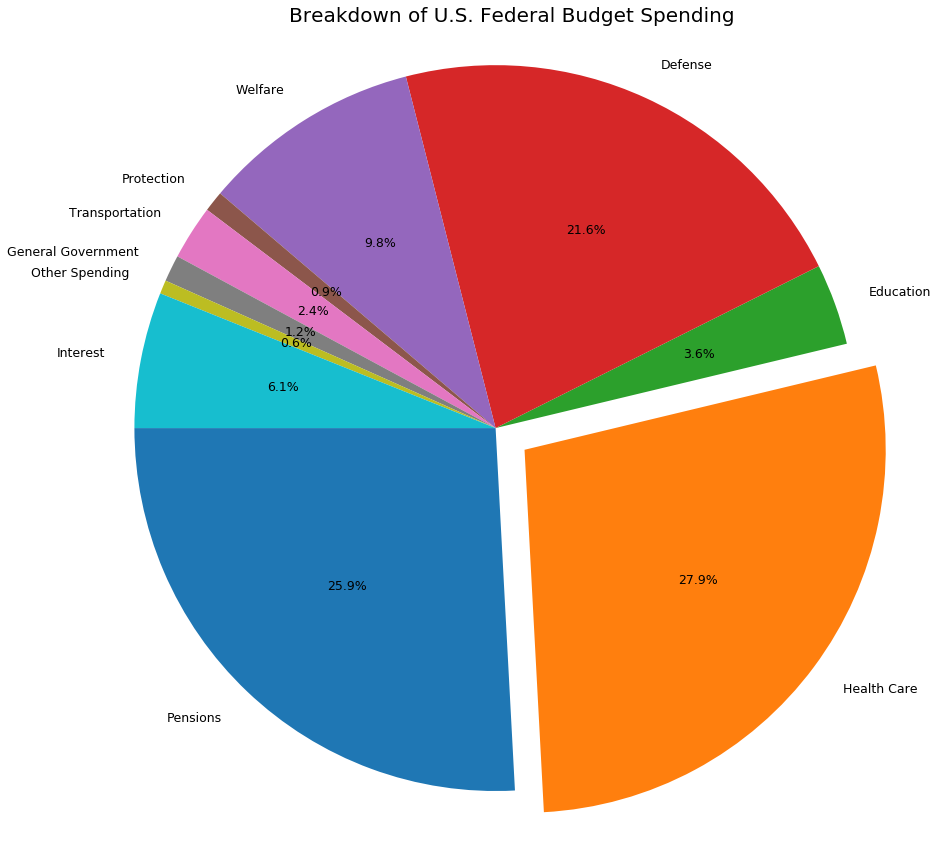

In [4]:
labels = budget['Sector']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)  
fig1, ax1 = plt.subplots(figsize = (12,12))
ax1.pie(budget['2015'], explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)

ax1.axis('equal')  
plt.title('Breakdown of U.S. Federal Budget Spending',fontsize = 20)
plt.tight_layout()
plt.show()

As we can see, Health Care spending accounts for 27.9% of all Federal spending (not counting military spending, which is not included here). With such a big portion of the federal budget being spent on this, the government must surely be affected by price changes in medications that it purchases through its Medicaid programs

## Analysis of Drug Prices
With an understanding of the importance of Medicare spending to the Federal Budget of the United States, we can get started on analyzing one of the areas of spending within this sector, drug purchases for Medicare beneficiaries. If you're not familiar with the Medicare program, I just want to point out that sometimes these medication purchases require a co-pay, that is, the government pays for a portion of the drug, and the beneficiary pays for the remaining share of the cost. Since I am only interested in the U.S. Budget Data, however, I will only be looking at the U.S. consumption.
### Importing the Data

In [5]:
r = requests.get('https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Information-on-Prescription-Drugs/Downloads/Part_B_All_Drugs_2015.zip')
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

#The filename once downloaded will become this:
filename = "Medicare_Drug_Spending_PartB_All_Drugs_YTD_2015_12_06_2016.xlsx"

Now that the data is in the directory where we are currently working, we can now put it into a dataframe.
The file has three sheets, and we're only interested in the third, named ***Data***. Furthermore, this sheet also has some rows that we need to skip in order to get to the actual table, as well as some rows with empty values. 

Below, I make sure to account for that when reading the data

In [6]:
#The parameters sheetname and skiprows ensure we get eactly what we want, and the method dropna() ensures we only get populated data
data = pd.read_excel(filename, sheetname= 'Data', skiprows = 3)
# I choose to only work with drugs that have all the data available, so I drop all rows with NaN values
data.dropna(inplace= True)
data

,HCPCS Description,HCPCS Code,"Claim Count, 2011","Total Spending, 2011","Beneficiary Count, 2011","Total Annual Spending Per User, 2011","Unit Count, 2011","Average Cost Per Unit, 2011","Average Beneficiary Cost Share, 2011","Claim Count, 2012",...,"Average Cost Per Unit, 2014","Average Beneficiary Cost Share, 2014","Claim Count, 2015","Total Spending, 2015","Beneficiary Count, 2015","Total Annual Spending Per User, 2015","Unit Count, 2015","Average Cost Per Unit, 2015","Average Annual Beneficiary Cost Share, 2015","Annual Change in Average Cost Per Unit, 2015"
0,5% dextrose/normal saline (500 ml = 1 unit),J7042,53117.0,2.835140e+04,19222.0,1.474945,76110.0,0.372506,0.399200,40904.0,...,0.570084,0.531123,29057.0,2.553506e+04,11708.0,2.180992,41728.0,0.611941,0.534204,0.073422
1,5% dextrose/water (500 ml = 1 unit),J7060,81401.0,1.383810e+05,18668.0,7.412737,125300.0,1.104397,1.527404,70397.0,...,1.276123,2.003413,49897.0,1.157459e+05,9575.0,12.088347,69135.0,1.674201,3.537432,0.311944
3,"Albuterol, inhalation solution, fda-approved f...",J7611,40863.0,3.957224e+05,19915.0,19.870568,4363244.3,0.090695,4.910761,39535.0,...,0.103196,2.245162,36115.0,2.228659e+05,26013.0,8.567480,1896383.0,0.117522,2.164169,0.138819
4,"Albuterol, inhalation solution, fda-approved f...",J7613,1882064.0,2.824052e+07,537176.0,52.572185,456213793.3,0.061902,13.013489,1897919.0,...,0.051076,8.853735,1553598.0,2.060323e+07,516660.0,39.877739,321038567.3,0.064177,10.168038,0.256487
5,"Albuterol, up to 2.5 mg and ipratropium bromid...",J7620,1770476.0,4.511230e+07,403021.0,111.935361,188450728.5,0.239385,26.238978,1738230.0,...,0.180748,16.938294,1454626.0,2.365385e+07,415857.0,56.879780,141763520.5,0.166854,14.887440,-0.076868
9,Aminolevulinic acid hcl for topical administra...,J7308,90967.0,1.513499e+07,60167.0,251.549621,104415.0,144.950304,55.833074,109308.0,...,234.697861,88.715651,138421.0,4.264713e+07,91528.0,465.946316,158923.5,268.350083,100.179013,0.143385
14,"Arformoterol, inhalation solution, fda approve...",J7605,298228.0,9.400010e+07,56096.0,1675.700614,17531898.0,5.361661,352.719106,358855.0,...,6.154938,465.915097,420853.0,1.786983e+08,68624.0,2604.020737,24863249.0,7.187247,553.431330,0.167721
17,Bcg (intravesical) per instillation,J9031,153086.0,1.827720e+07,28873.0,633.020567,157660.0,115.927964,133.201077,151888.0,...,119.351281,137.459486,147903.0,1.815319e+07,27453.0,661.246053,151478.5,119.840029,139.460093,0.004095
18,"Budesonide, inhalation solution, fda-approved ...",J7626,756310.0,1.981164e+08,142240.0,1392.831498,44120096.0,4.490388,294.722997,764593.0,...,5.162385,351.523443,749019.0,2.299882e+08,136283.0,1687.578416,43575264.0,5.277954,356.657124,0.022387
21,"Capecitabine, 500 mg",WW093,110836.0,1.977389e+08,27063.0,7306.613039,8360880.0,23.650485,1472.790653,113376.0,...,31.406970,2072.089760,115163.0,1.928636e+08,26691.0,7225.791623,8811405.0,21.887951,1480.993843,-0.303086


### Manipulating the data
There are a lot of rows, which can make the data plotting too convoluted. Since I am particularly interested in the price changes depending on the number of users, I will take the top 30 most used drugs and the least 30 most used drugs, that way, I can compare how prices are increased depending on number of users. 

Below, I get two new Dataframes (top 30, bottom 30), using Beneficiary Count, 2011 as an indicator of number of users and then I sort the data using that column. After I get the data I want to focus on, I merge the two new dataframes to create a new one, which should have a total of 60 rows comprising just the data I want.

In [7]:
data = data.sort_values('Beneficiary Count, 2011', ascending=False) #Sorting the data by Beneficiary Count
data_top = data.head(n=30) #Getting the most used drugs into a DataFrame
data_bottom = data.tail(n=30) #Getting the least used drugs into a DataFrame

#Merging the dataframes to create a single dataframe with the right data
frames = [data_top, data_bottom] 
drug_data = pd.concat(frames)

#Now for this specific plot, I will only be needing some columns so I create another dataframe, keeping the old one in case I
#decide to use the data
price_data = drug_data[['HCPCS Description','Average Cost Per Unit, 2011','Average Cost Per Unit, 2012',
                        'Average Cost Per Unit, 2013','Average Cost Per Unit, 2014',
                        'Average Cost Per Unit, 2015']]
price_data.columns = ['Name', '2011','2012','2013','2014','2015'] #Renaming the columns for ease of use

#Resetting the index, not actually needed but it makes the DataFrame look nicer,
#also, if someone wants to access a specific value using .loc[row, column], resetting the indexes allows for easy access
#this is preferrable to using the Name as the index, the numbers will make definitely help with retrival of specific entries
price_data.reset_index(drop=True, inplace = True) 

Finally, we have a DataFrame! It looks like this:

In [8]:
price_data

,Name,2011,2012,2013,2014,2015
0,"Influenza virus vaccine, split virus, when adm...",13.311594,13.634089,13.859630,14.197731,15.079521
1,"Influenza virus vaccine, split virus, when adm...",12.847727,12.228661,11.797035,11.915256,12.394812
2,"Influenza virus vaccine, split virus, when adm...",9.238225,10.241759,9.446370,9.374694,7.430369
3,Vaccine for influenza for injection into muscl...,12.431823,12.434328,12.286621,13.508952,12.696957
4,Vaccine for pneumococcal polysaccharide for in...,50.543199,58.191674,63.694286,67.996518,71.578122
5,Vaccine for influenza for injection into muscle,29.527399,30.144199,30.347737,31.472941,34.516282
6,"Injection, triamcinolone acetonide, not other...",1.620285,1.683443,1.744921,1.750780,1.748570
7,"Injection, methylprednisolone acetate, 40 mg",2.759352,3.476352,2.828619,2.948240,3.517409
8,"Injection, regadenoson, 0.1 mg",51.844593,52.447633,52.788253,52.009950,51.964209
9,"Injection, methylprednisolone acetate, 80 mg",6.916163,6.722732,5.481541,5.637354,6.527013


### Plotting the Data
With the data in a DataFrame, I can now begin plotting. I was having some trouble adding new calculated columns. I was specifically getting this error:

*A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_indexer,col_indexer] = value instead
See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy*

Even after trying using .loc[row_indexer, col_indexer] I was having problems, so I decided to transer the data into an array.

Because some drugs are exhorbitantly more expensive than others, I decided to use the mpld3 package. This allows for two things:
- If you hover over a line, it will show you the name of the line to which it belongs
- On the bottom left of the screen there are three icons, which allow you to zoom into an area of the graph, and generally move and explore the graph

In [9]:
price_array = price_data.as_matrix()   #converted the dataframe to an array for ease of use
new_price_array=np.delete(price_array,0,-1)  #Removing the first column, which is not needed

#Setting the parameters for the axis and the plot
year = [2011, 2012, 2013, 2014, 2015]
my_xticks = ['2011', '2012', '2013', '2014', '2015']
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(year, my_xticks)
plt.title('Absolute Dollar Value of Drugs Over Time',fontsize = 20)
ax.set_ylabel('Price in dollars (US$)',fontsize = 15)  #setting y label
ax.set_xlabel('Year',fontsize = 15)   #setting x label
plt.margins(x=0) #Making sure there is no gap between the plotted lines and the x axis
plt.margins(y=0) #Making sure there is no gap between the plotted lines and the y axis

# Plotting the drugs, I decided to go in increments of 10, instead of 30 as originally outlined in the Data Report
# because this makes it much easier to notice trends across the groups. The code below iterates through
# the array and plots the lines by groups of 10, the first 10 (orange) are the most used, 
#the bottom 10 are the least used (violet)

for i in range (0,10): #plotting first 10 as orange
    line = ax.plot(year, new_price_array[i],color='darkorange')
    #The code below connects the plotted line to its corresponding name in the array
    mpld3.plugins.connect(f, mpld3.plugins.LineLabelTooltip(line[0], label=price_array[i][0]))
for i in range (10,20): #plotting the next 10 as red 
    line = ax.plot(year, new_price_array[i],color='tomato')
    mpld3.plugins.connect(f, mpld3.plugins.LineLabelTooltip(line[0], label=price_array[i][0]))   
for i in range (20,30): #plotting the next 10 as green 
    line = ax.plot(year, new_price_array[i],color='green')
    mpld3.plugins.connect(f, mpld3.plugins.LineLabelTooltip(line[0], label=price_array[i][0]))
for i in range (30,40): #plotting the next 10 as blue 
    line = ax.plot(year, new_price_array[i],color='steelblue')
    mpld3.plugins.connect(f, mpld3.plugins.LineLabelTooltip(line[0], label=price_array[i][0]))
for i in range (40,50): #plotting the next 10 as violet 
    line = ax.plot(year, new_price_array[i],color='saddlebrown')
    mpld3.plugins.connect(f, mpld3.plugins.LineLabelTooltip(line[0], label=price_array[i][0]))    
for i in range (50,60):#plotting the next 10 as violet 
    line = ax.plot(year, new_price_array[i],color='violet')
    mpld3.plugins.connect(f, mpld3.plugins.LineLabelTooltip(line[0], label=price_array[i][0]))

mpld3.display()


**Notes on using the graph: ** This section explains how to use the interactive graph. There are three buttons [home, directional arows, zoom] (left to right) on the bottom left corner.
- **Home:** This will reset the graph to the original position and zoom
- **Arrows:** Once zoomed in, use this tool to move around the graph. Use it by selecting the tool, then dragging or 'pulling' across the graph to move
- **Zoom:** This will allow you to zoom into areas of the graph. To use it, select the tool, click and drag to create an area to zoom into. The smaller/more specific the area, the larger the zoom. You can zoom multiple times. You can also use your trackpad's multitouch feature to zoom in, currently unsure if you can use the mouse wheel, but I think so. What a great package!
- Sometimes the graph gets a little buggy with displaying names, usually you can fix this by exiting the graph with your cursor and entering touching just the line you want

### Observations:
After interacting a little and exploring the graph, there are some interesting observations.
- The least used drugs are generally the more expensive (per unit). This is noticeable because the violet lines tend to be towards the top of the graph. On average, the U.S. government pays more money per unit for these drugs.
- Similarly, the most used drugs tend to be the least costly (per unit). This is noticeable because out of the bottom 8 drugs, 6 of them are painted orange! 


### Plotting relative increases/decreases
The absolute values are interesting, and they give us important information on a specific drug's performance over time. But my research question attempts to look at the effect of price increases in drugs on the U.S. budget, therefore it is most important to use a percentage increase/decrease in a drugs price.

This will help by normalizing the data between the most expensive and cheapest drugs, and paint a clearer picture of which drugs are subject to the most volatility.

In [10]:
#To plot this, I will create a new array with the data. Because it uses the percentage differences, it will be smaller than the
#previous by one column
percentchange = np.zeros(shape=(60,4))


for i in range(0,len(new_price_array)):
    percentchange[i][0]=(new_price_array[i][1]-new_price_array[i][0])/new_price_array[i][0]
    percentchange[i][1]=(new_price_array[i][2]-new_price_array[i][1])/new_price_array[i][1]
    percentchange[i][2]=(new_price_array[i][3]-new_price_array[i][2])/new_price_array[i][2]
    percentchange[i][3]=(new_price_array[i][4]-new_price_array[i][3])/new_price_array[i][3]

#Setting the parameters for the axis and the plot
pctchange_year = [2011,2012, 2013, 2014]
pctchange_xticks = ['2011', '2012', '2013', '2014']

pct_f, pct_ax = plt.subplots(figsize=(10, 10))
plt.xticks(pctchange_year, pctchange_xticks)
plt.title('Price Variation',fontsize = 20)
pct_ax.set_ylabel('Percent Change in Price (%)', fontsize = 15)  #setting y label
pct_ax.set_xlabel('Year', fontsize = 15)   #setting x label
plt.margins(x=0) #Making sure there is no gap between the plotted lines and the x axis
plt.margins(y=0) #Making sure there is no gap between the plotted lines and the y axis

#Plotting the drugs, again by increments, the color scheme remains the same
for i in range (0,10):
    pct_line = pct_ax.plot(pctchange_year, percentchange[i],color='darkorange')
    mpld3.plugins.connect(pct_f, mpld3.plugins.LineLabelTooltip(pct_line[0], label=price_array[i][0]))
for i in range (10,20):
    pct_line = pct_ax.plot(pctchange_year, percentchange[i],color='tomato')
    mpld3.plugins.connect(pct_f, mpld3.plugins.LineLabelTooltip(pct_line[0], label=price_array[i][0]))
for i in range (20,30):
    pct_line = pct_ax.plot(pctchange_year, percentchange[i],color='green')
    mpld3.plugins.connect(pct_f, mpld3.plugins.LineLabelTooltip(pct_line[0], label=price_array[i][0]))
for i in range (30,40):
    pct_line = pct_ax.plot(pctchange_year, percentchange[i],color='steelblue')
    mpld3.plugins.connect(pct_f, mpld3.plugins.LineLabelTooltip(pct_line[0], label=price_array[i][0]))
for i in range (40,50):
    pct_line = pct_ax.plot(pctchange_year, percentchange[i],color='saddlebrown')
    mpld3.plugins.connect(pct_f, mpld3.plugins.LineLabelTooltip(pct_line[0], label=price_array[i][0]))
for i in range (50,60):
    pct_line = pct_ax.plot(pctchange_year, percentchange[i],color='violet')
    mpld3.plugins.connect(pct_f, mpld3.plugins.LineLabelTooltip(pct_line[0], label=price_array[i][0]))

mpld3.display()

**Note on interpreting the graph:** This graph shows the amount that the price changed from year to the next. For example, the green line for the drug: "Injection,  methylprednisolone acetate, 20 mg" has a 1.2 value for the year 2011. This means that for the year 2011-2012 the drug increased by 1.2% in average price per unit

### Observations:
Now we can get to interpreting observations:
- Immediately we notice that some of the bigger  fluctuations come from two orange (most used) drugs. This means that the U.S. needs to be weary of price increases for drugs that represent a huge volume. It can easily affect the medicare spending budget and throw it off balance
- The drugs with the most fluctuation are all injections. Perhaps they saw themselves affected by a shortage? Maybe even the anti-vaccine movement
- Most drugs, however trend around the following range: -0.2 < percent change < 0.2. There doesn't seem to be a particular correlation between how many beneficiaries these drugs have and their changes in price over time. Which is good news for the Federal budget!

### Further analysis
Some of the lines with very large fluctuations have peaked my interest. Why were the fluctuations so much? Did it really come from increases in drug prices, or, since the data is Average spending per unit, from the number of beneficiaries? Fortunately, I can easily look into this data using Pandas! With a quick hover over the green, blue, and orange lines with huge fluctuations, I noted down that the drugs I am interested in are the following:
- Injection,  methylprednisolone acetate, 20 mg
- Injection, morphine sulfate, up to 10 mg
- Injection, vitamin b-12 cyanocobalamin, up to 1000 mcg
- Injection, ketorolac tromethamine, per 15 mg 

Good thing we saved the drug_data DataFrame all the way in the beginning, those extra columns will come in handy!

In [11]:
#First, we want to set the index to the Name of the drug to make it easier to search for it.
drug_data.reset_index(drop=True, inplace = True) 

beneficiary_count = drug_data[['HCPCS Description','Beneficiary Count, 2011','Beneficiary Count, 2012',
                        'Beneficiary Count, 2013','Beneficiary Count, 2014',
                        'Beneficiary Count, 2015']]
beneficiary_count.columns = ['Name', '2011','2012','2013','2014','2015'] #Renaming the columns for ease of use

#Here I create an array with the names of the drugs I am interested in, as well as some randomly selected drugs for reference
names_of_drugs = ['Injection, methylprednisolone acetate, 20 mg','Injection, morphine sulfate, up to 10 mg'
                 ,'Injection, vitamin b-12 cyanocobalamin, up', 'Injection, ketorolac tromethamine, per 15 mg'
                  ,'Injection, dexamethasone, intravitreal implant, 0.1 mg', 'Injection, levoleucovorin calcium, 0.5 mg'
                  ,'Methotrexate sodium, 5 mg']


Now I create an array with the indexes of the drugs to do the final analysis. To do this I iterate through the names_of_drugs array, each time getting the appropriate index within the DataFrame and appending it to a new dataframe. I am sure there must be a method that returns just the index value, but I could not find it. Right now the index_of_drugs, alas, I could not find it, so I did some string slicing to each element as it came into the array

In [12]:
index_of_drugs = []
for val in names_of_drugs:
    index_of_drugs.append(str(beneficiary_count[beneficiary_count['Name'].str.contains(val)].index)[12:14])
index_of_drugs = list(map(int, index_of_drugs)) #converting back into an int array

#Now I create a new Dataframe, with the same columns as the previous
selected_drugs = pd.DataFrame(columns= beneficiary_count.columns.tolist())
#And now I populate the DataFrame
i = 0
for val in index_of_drugs:
    selected_drugs.loc[i] = beneficiary_count.loc[val].tolist()
    i = i+1
    
#We end up with a DataFrame that looks like this:
selected_drugs

,Name,2011,2012,2013,2014,2015
0,"Injection, methylprednisolone acetate, 20 mg",171707.0,170210.0,164977.0,159503.0,153424.0
1,"Injection, morphine sulfate, up to 10 mg",10529.0,10142.0,8824.0,8743.0,8124.0
2,"Injection, vitamin b-12 cyanocobalamin, up to...",641776.0,665385.0,637994.0,583712.0,574137.0
3,"Injection, ketorolac tromethamine, per 15 mg",389944.0,372422.0,412644.0,436105.0,434174.0
4,"Injection, dexamethasone, intravitreal implant...",3970.0,5113.0,6403.0,9105.0,12241.0
5,"Injection, levoleucovorin calcium, 0.5 mg",5622.0,11372.0,7886.0,6552.0,6273.0
6,"Methotrexate sodium, 5 mg",6832.0,6545.0,6227.0,6198.0,6219.0


### Plotting the Data: Beneficiary Count changes

In [13]:
selected_array = selected_drugs.as_matrix()   #converted the dataframe to an array for ease of use
new_selected=np.delete(selected_array,0,-1)  #Removing the first column, which is not needed

selected_percentchange = np.zeros(shape=(7,4))

#Calculating the percentage change for this array
for i in range(0,len(new_selected)):
    selected_percentchange[i][0]=(new_selected[i][1]-new_selected[i][0])/new_selected[i][0]
    selected_percentchange[i][1]=(new_selected[i][2]-new_selected[i][1])/new_selected[i][1]
    selected_percentchange[i][2]=(new_selected[i][3]-new_selected[i][2])/new_selected[i][2]
    selected_percentchange[i][3]=(new_selected[i][4]-new_selected[i][3])/new_selected[i][3]
    

In [14]:
#Setting the parameters for the axis and the plot
selected_year = [2011,2012, 2013, 2014]
selected_xticks = ['2011', '2012', '2013', '2014']

slct_f, slct_ax = plt.subplots(figsize=(10, 10))
plt.xticks(selected_year, selected_xticks)
plt.title('Beneficairy Count Variation',fontsize = 20)
slct_ax.set_ylabel('Percent Change in Beneficiary Count (%)', fontsize = 15)  #setting y label
slct_ax.set_xlabel('Year', fontsize = 15)   #setting x label
plt.margins(x=0) #Making sure there is no gap between the plotted lines and the x axis
plt.margins(y=0) #Making sure there is no gap between the plotted lines and the y axis

#This time I took the lines of the four drugs I originally outlined as having a lot of variation in price and plotted them as red
for i in range (0,4):
    slct_line = slct_ax.plot(selected_year, selected_percentchange[i],color='red')
    mpld3.plugins.connect(slct_f, mpld3.plugins.LineLabelTooltip(slct_line[0], label=selected_array[i][0]))
#The randomly selected drugs, used for reference, are plotted as orange
for i in range (4,7):
    slct_line = slct_ax.plot(selected_year, selected_percentchange[i],color='darkorange')
    mpld3.plugins.connect(slct_f, mpld3.plugins.LineLabelTooltip(slct_line[0], label=selected_array[i][0]))


mpld3.display()

### Observations:
It seems like the large variations in price were not due to large increases in beneficiary count, in fact some of the drugs with less variation in price, experiences heavier fluctuations in population count ("Injections, levoleucovorin calcium, 0.5 mg" for example, doubled in number of beneficiaries from 2011 to 2012)

### Further Analysis: Final Data

Fortunately, it is now pretty easy to plot several charts using the same code as before! All that I need is to change the array specifying what columns to keep, and the rest is just changing variable names for ease of use. With that in mind, I decided that maybe beneficiary count wasn't exactly what I was looking for, since Average Unit Price uses Unit Count per year instead of Beneficiary count to be calculated. So, below, I plot a graph for the fluctuations in Unit Count.

In [15]:
#First, we want to set the index to the Name of the drug to make it easier to search for it.
drug_data.reset_index(drop=True, inplace = True) 

unit_count = drug_data[['HCPCS Description','Unit Count, 2011','Unit Count, 2012',
                        'Unit Count, 2013','Unit Count, 2014',
                        'Unit Count, 2015']]
unit_count.columns = ['Name', '2011','2012','2013','2014','2015'] #Renaming the columns for ease of use

index_of_drugs = []
for val in names_of_drugs:
    index_of_drugs.append(str(unit_count[unit_count['Name'].str.contains(val)].index)[12:14])
index_of_drugs = list(map(int, index_of_drugs)) #converting back into an int array

#Now I create a new Dataframe, with the same columns as the previous
selected_drugs = pd.DataFrame(columns= unit_count.columns.tolist())
#And now I populate the DataFrame
i = 0
for val in index_of_drugs:
    selected_drugs.loc[i] = unit_count.loc[val].tolist()
    i = i+1
    
#We end up with a DataFrame that looks like this:
selected_drugs

,Name,2011,2012,2013,2014,2015
0,"Injection, methylprednisolone acetate, 20 mg",424241.4,416365.0,403560.3,390929.2,372570.1
1,"Injection, morphine sulfate, up to 10 mg",107631.0,113048.7,53552.9,108432.1,235448.0
2,"Injection, vitamin b-12 cyanocobalamin, up to...",2771896.3,2859408.5,2624646.6,2337047.6,2407486.6
3,"Injection, ketorolac tromethamine, per 15 mg",1949867.9,1777479.0,2005344.7,2130084.7,2104282.2
4,"Injection, dexamethasone, intravitreal implant...",42489.0,55621.0,73814.0,108305.0,164843.0
5,"Injection, levoleucovorin calcium, 0.5 mg",19199270.7,45230493.2,33975431.2,32779286.0,32159375.0
6,"Methotrexate sodium, 5 mg",327072.1,300695.4,280817.6,272844.5,263759.4


In [16]:
selected_array = selected_drugs.as_matrix()   #converted the dataframe to an array for ease of use
new_selected=np.delete(selected_array,0,-1)  #Removing the first column, which is not needed

selected_percentchange = np.zeros(shape=(7,4))

#Calculating the percentage change for this array
for i in range(0,len(new_selected)):
    selected_percentchange[i][0]=(new_selected[i][1]-new_selected[i][0])/new_selected[i][0]
    selected_percentchange[i][1]=(new_selected[i][2]-new_selected[i][1])/new_selected[i][1]
    selected_percentchange[i][2]=(new_selected[i][3]-new_selected[i][2])/new_selected[i][2]
    selected_percentchange[i][3]=(new_selected[i][4]-new_selected[i][3])/new_selected[i][3]
    
#Setting the parameters for the axis and the plot
selected_year = [2011,2012, 2013, 2014]
selected_xticks = ['2011', '2012', '2013', '2014']

slct_f, slct_ax = plt.subplots(figsize=(10, 10))
plt.xticks(selected_year, selected_xticks)
plt.title('Unit Count Variation',fontsize = 20)
slct_ax.set_ylabel('Percent Change in Unit Count(%)', fontsize = 15)  #setting y label
slct_ax.set_xlabel('Year', fontsize = 15)   #setting x label
plt.margins(x=0) #Making sure there is no gap between the plotted lines and the x axis
plt.margins(y=0) #Making sure there is no gap between the plotted lines and the y axis

#This time I took the lines of the four drugs I originally outlined as having a lot of variation in price and plotted them as red
for i in range (0,4):
    slct_line = slct_ax.plot(selected_year, selected_percentchange[i],color='red')
    mpld3.plugins.connect(slct_f, mpld3.plugins.LineLabelTooltip(slct_line[0], label=selected_array[i][0]))
#The randomly selected drugs, used for reference, are plotted as orange
for i in range (4,7):
    slct_line = slct_ax.plot(selected_year, selected_percentchange[i],color='darkorange')
    mpld3.plugins.connect(slct_f, mpld3.plugins.LineLabelTooltip(slct_line[0], label=selected_array[i][0]))


mpld3.display()

### Observations:
Now it is still generally looking about the same. However, one drug's fluctuations can be attributed, in part, to large change in unit count. "Injections, morphine sulfate, up to 10 mg" changed quite a bit in the amount of units purchased. 

Interestingly, "Injection, levoleucovorin calcium, 0.5 mg" also fluctuated a lot but, as it is colored orange, the drug price actually didn't change all that much.

For the remaining of the drugs, with little fluctuation in Unit Count, it must be the price that is changing.

Another interesting observation is that some drugs like "Injection, levoleucovorin calcium, 0.5 mg" have almost 1:1 mappings of the line from Beneficiary Count to Unit count, while some drugs like "Injections, morphine sulfate, up to 10 mg" fluctuated heavily without the corresponding increases in Beneficiary Count

## Summary of findings
This proved to be a very interesting exercise, and it got me thinking about how the U.S. plans its federal budget. With such a large percentage of spending going towards Medicare and other health related services, the government is heavily afflicted by changes in the prices or number of beneficiaries of certain drugs.

Among the more interesting ideas is that the fewer beneficiaries of a drug, the more expensive it is in absolute terms. Yet this doesn't mean these will be the most volatile drugs, in fact, while there was no significant correlation, the most volatile drugs were some of the most used drugs

Furthermore, a deeper analysis into why the average price per unit was so volatile, revealed that beneficiary increases/decreases were not the root cause, sometimes, the government bought more or less units regardless of beneficiary increases (and sometimes almost perfectly correlated with beneficiary increases) it must be the actual price of these medications that is putting a strain on the federal budget.